
# Проверка гипотез с помощью python.

## Задание

* Выполненить проверку предложенной гипотезы
* Выполненить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [329]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import seaborn as sns

from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats

import warnings 
warnings.filterwarnings("ignore") # для уменьшения количества выводимых ошибок
pd.set_option('display.max_columns', None) # отобразить все колонки

## 2. Данные

In [330]:
df = pd.read_csv("./churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [331]:
# ваше решение
statistics = pd.DataFrame({
    'Среднее': df.loc[:,['SeniorCitizen','tenure','MonthlyCharges']].mean(),
    'Медиана': df.loc[:,['SeniorCitizen','tenure','MonthlyCharges']].median(),
    'Дисперсия': df.loc[:,['SeniorCitizen','tenure','MonthlyCharges']].var(),
    'Стандартное отклонение': df.loc[:,['SeniorCitizen','tenure','MonthlyCharges']].std()
})

statistics.T

,SeniorCitizen,tenure,MonthlyCharges
Среднее,0.162147,32.371149,64.761692
Медиана,0.000000,29.000000,70.350000
Дисперсия,0.135875,603.168108,905.410934
Стандартное отклонение,0.368612,24.559481,30.090047


**Вывод:**
- Большинство клиентов не являются пожилыми (среднее значение SeniorCitizen 0.162147).
- Дисперсия столбца SeniorCitizen 0.135875, что означает, что значения в этом столбце распределены относительно равномерно от среднего значения.
- Стандартное отклонение 0.368612 также показывает разброс данных в столбце.

- Средняя продолжительность нахождения клиента в компании около 32 месяцев.
- Медиана 29.000000 указывает на то, что половина клиентов провели в компании менее 29 месяцев.
- Высокая дисперсия (603.168108) и стандартное отклонение (24.559481) в столбце Tenure могут указывать на значительный разброс в данных.

- Клиенты в среднем тратят 64.761692 на услуги каждый месяц.
- Медиана 70.350000 указывает на то, что половина клиентов платит более 70.35 в месяц за услуги.
- Столбец имеет довольно высокую дисперсию (905.410934) и стандартное отклонение (30.090047), что указывает на значительный разброс данных.

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [332]:
# ваше решение
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**Вывод:**
- Всего в таблице содержится 7043 записи.
- Уникальных значений в категориальных столбцах в среднем 2-3, в PaymentMethod - 4.
- Телефонная связь есть у большинства клиентов (6361 раз), другие услуги клиенты чаще не используют.
- Партнеры есть у половины клиентов (3641), но большинство являются кормильцами (4933).
- Большинство клиентов используют услугу Fiber optic в столбце InternetService (3096).
- Большинство клиентов обновляют договор ежемесячно (3875).
- Большинство клиентов выбирают электронный чек в качестве оплаты (2365).
- В основном клиенты остаются (5174).

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [333]:
# ваше решение
df.duplicated().sum()

np.int64(0)

**Вывод:**
Пропусков нет

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактов. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [334]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [335]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [336]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [337]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2308,3324-OIRTO,Male,0,Yes,Yes,71,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.65,7288.4,No
5751,0932-YIXYU,Female,0,No,No,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1029.8,No
2438,7089-IVVAZ,Female,0,No,No,8,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.35,847.3,Yes
507,7218-HKQFK,Male,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,167.5,Yes
2208,7216-EWTRS,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,100.8,Yes


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [338]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Но давайте проверим:

In [339]:
print('Количество совпадений по нашей теории:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']]['customerID'].count())
print('Количество различий:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) != df['tenure']]['customerID'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6429


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [340]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['MonthlyCharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)

print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

В среднем new_total отличается от TotalCharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [341]:
df.fillna({'TotalCharges':0}, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

In [342]:
# ваше решение
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Вывод:**
Считаю, что данные типы данных можно оставить

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [343]:
# ваше решение
df_no = df.loc[df.Churn == 'No']['tenure']
df_no.head().T

0     1
1    34
3    45
6    22
7    10
Name: tenure, dtype: int64

In [344]:
df_yes = df.loc[df.Churn == 'Yes']['tenure']
df_yes.head().T

2      2
4      2
5      8
8     28
13    49
Name: tenure, dtype: int64

In [345]:
# H0 - среднее количество месяцев, в течение которых клиент оставался в компании, не отличается между двумя выборками.
# H1 - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

_, pvalue = stats.ttest_ind(df_no, df_yes)

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Отвергаем нулевую гипотезу: средние различаются.')
else:
    print(f'P-value:{pvalue:.5f}. Не отвергаем нулевую гипотезу: средние не различаются.')

P-value:0.00000. Отвергаем нулевую гипотезу: средние различаются.


**Вывод:**

Cуществует статистически значимое различие в среднем количестве месяцев, проведенных клиентами в компании, в зависимости от каких-то факторов, которые разделяют выборки на две группы.

Таким образом, можно предположить, что некий фактор влияет на то, сколько клиентов остаются в компании, и необходимо дальше исследовать этот фактор для понимания его влияния и принятия соответствующих решений.

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответсвуют ли распредения нормальному?

In [346]:
# ваше решение

alpha = .05

# Определяю выборку столбцов с числовыми признаками:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df.loc[:, numeric_cols]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


**Гипотезы:**
- H0: выборка имеет распределение по Гауссу (нормальное распределение).
- H1: выборка не имеет распределения по Гауссу (не нормальное распределение).

**1. Тест Шапиро-Уилка:**
не выполняем, т.к. размер выборки > 5000 (7043) и p-value может быть неточным

In [347]:
# 2. К'2-тест Д'Агостино

for col in numeric_cols:
    _, pvalue = stats.normaltest(df[col])

    if pvalue < alpha:
        print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
    else:
        print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается
P-value:0.00000. Нулевая гипотеза отвергается
P-value:0.00000. Нулевая гипотеза отвергается


In [348]:
# 3. Критерий Андерсона-Даринга


for col in numeric_cols:
    result = stats.anderson(df[col])

    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print(f'Уровень значимости {sl:.2f}% : критическое значение {cv:.3f}, данные выглядят нормально (не удается отклонить H0)')
        else:
            print(f'Уровень значимости {sl:.2f}% : критическое значение {cv:.3f}, данные не выглядят нормально (отклоняем H0)')

Уровень значимости 15.00% : критическое значение 0.576, данные не выглядят нормально (отклоняем H0)
Уровень значимости 10.00% : критическое значение 0.656, данные не выглядят нормально (отклоняем H0)
Уровень значимости 5.00% : критическое значение 0.787, данные не выглядят нормально (отклоняем H0)
Уровень значимости 2.50% : критическое значение 0.917, данные не выглядят нормально (отклоняем H0)
Уровень значимости 1.00% : критическое значение 1.091, данные не выглядят нормально (отклоняем H0)
Уровень значимости 15.00% : критическое значение 0.576, данные не выглядят нормально (отклоняем H0)
Уровень значимости 10.00% : критическое значение 0.656, данные не выглядят нормально (отклоняем H0)
Уровень значимости 5.00% : критическое значение 0.787, данные не выглядят нормально (отклоняем H0)
Уровень значимости 2.50% : критическое значение 0.917, данные не выглядят нормально (отклоняем H0)
Уровень значимости 1.00% : критическое значение 1.091, данные не выглядят нормально (отклоняем H0)
Уровен

**Вывод:**

Во всех трех статистических тестах на норму H0 отклоняется, т.е. распределение выборки не является нормальным

## 6 ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика - выяснить причину ухода клиента.

Ваша задача - провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1) Предобработка данных - измените датасет, в части: категориальные признаки надо перевести в числовые представления (закодировать). Главное - понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное. 
2) Выберите нужные гипотезы, основываясь на типах признаков.
3) Проведите анализ, и выясните, почему клиент уходит, с чем коррелирует `Churn`, может это зависит от пола клиента? Или есть иные обстоятельства?
4) После проверки гипотез, постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
5) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить - может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

**Подсказка:** для того, чтобы перевести наши категориальные переменные в числа (`0`, `1`, `2` и т.д.), можно воспользоваться функцией в `pandas`:

```python
pd.factorize(data[col])
```
Результат будет таким (если взять столбец `gender`):
- `(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))`

Где:
- `(array([0, 1, 1, ..., 0, 1, 1])` - это наш новый array, которым можем заменить значения
- `Index(['Female', 'Male'], dtype='object'))` - старые значения, соответствующие числам выше (`Female`=`0`, `Male`=`1`)

Соответственно, можем заменить значения в категориях на числа такой командой (если взять столбец `gender`):
```python
df['gender'] = pd.factorize(df['gender'])[0]
```

> **Примечание:** когда **категориальная** переменная изменяется на числа, она все равно остается **категориальной**! Просто теперь наш признак стал **закодированным** (то есть мы изменили слова на числа). 

In [349]:
# ваше решение
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [350]:
# Анализирую категориальные столбцы на предмет уникальных значений:
cat_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

for col in cat_cols:
    display(df[col].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [351]:
# В столбцах, где 2-3 уникальных значения, заменяю булевые значения на очевидные 0 и 1, а оставшиеся нейтральные значения на 2:
bool_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines', 'OnlineSecurity',\
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in bool_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else 2))

df.sample(5).T

,3173,5248,4538,5661,2150
customerID,9766-HGEDE,3239-TPHPZ,0378-TOVMS,4396-KLSEH,5628-FCGYG
gender,Female,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0
Partner,1,1,0,0,0
Dependents,0,0,0,0,0
tenure,17,12,3,4,21
PhoneService,1,1,1,1,1
MultipleLines,0,0,0,0,1
InternetService,No,No,Fiber optic,No,Fiber optic
OnlineSecurity,2,2,0,2,0


In [352]:
# Значения в остальных категориальных столбцах кодирую с помощью factorize():
dif_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

for col in dif_cols:
    df[col] = pd.factorize(df[col])[0]

df.sample(5).T

,3754,2127,5752,5817,334
customerID,7096-UCLNH,8035-BUYVG,7480-SPLEF,4361-JEIVL,2868-SNELZ
gender,1,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,0,1,1,0,0
Dependents,0,0,1,1,0
tenure,1,40,69,1,2
PhoneService,1,0,1,1,1
MultipleLines,0,2,1,0,1
InternetService,2,0,2,0,1
OnlineSecurity,2,1,2,0,0


При сравнивнении категориальной величины с другими категориальными величинами, то воспользуемся Chi-квадрат:

In [353]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',\
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',\
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    crosstab = pd.crosstab(df['Churn'], df[col])

    stat, pvalue, _, _ = stats.chi2_contingency(crosstab)

    if pvalue <= alpha:
        print(f'{col}: {pvalue:.4f}: Зависимый (отклонить H0)')
    else:
        print(f'{col}: {pvalue:.4f}: Независимый (не удается отклонить H0)')

gender: 0.4866: Независимый (не удается отклонить H0)
SeniorCitizen: 0.0000: Зависимый (отклонить H0)
Partner: 0.0000: Зависимый (отклонить H0)
Dependents: 0.0000: Зависимый (отклонить H0)
PhoneService: 0.3388: Независимый (не удается отклонить H0)
MultipleLines: 0.0035: Зависимый (отклонить H0)
InternetService: 0.0000: Зависимый (отклонить H0)
OnlineSecurity: 0.0000: Зависимый (отклонить H0)
OnlineBackup: 0.0000: Зависимый (отклонить H0)
DeviceProtection: 0.0000: Зависимый (отклонить H0)
TechSupport: 0.0000: Зависимый (отклонить H0)
StreamingTV: 0.0000: Зависимый (отклонить H0)
StreamingMovies: 0.0000: Зависимый (отклонить H0)
Contract: 0.0000: Зависимый (отклонить H0)
PaperlessBilling: 0.0000: Зависимый (отклонить H0)
PaymentMethod: 0.0000: Зависимый (отклонить H0)


Как видно из результатов анализа, почему клиент уходит, не зависит лишь от пола и наличия телефонной связи.
Остальные факторы, в том числе числовые, рассмотрим подробнее, построив тепловую карту корреляции phik

In [354]:
# Удаляю столбец CustomerID всвязи с неинформативностью:
df.drop('customerID', axis=1, inplace=True)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5614,1,0,1,1,68,1,1,1,1,1,0,0,0,0,1,1,2,85.50,5696.60,0
4744,1,1,0,0,64,1,0,2,2,2,2,2,2,2,2,1,2,20.05,1198.05,0
2563,1,1,0,0,25,1,1,1,0,1,1,0,1,1,0,0,1,105.95,2655.25,1
3557,0,1,0,0,33,0,2,0,1,1,1,0,1,1,0,1,2,59.45,1884.65,0
4063,0,0,0,0,10,1,1,1,0,1,1,0,0,1,0,1,0,94.85,953.45,1


<Axes: >

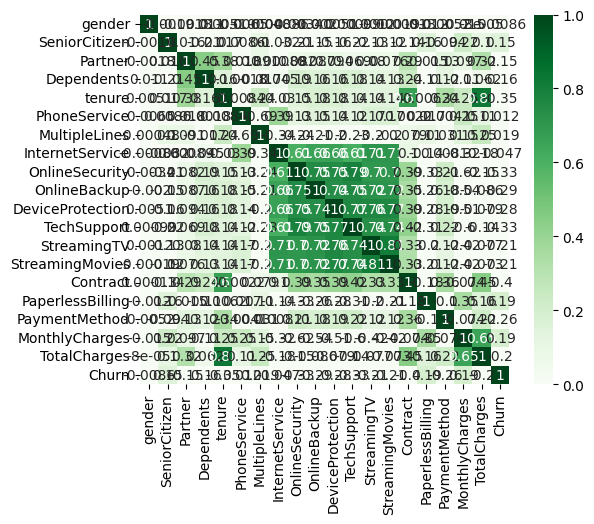

In [355]:

corrs = df.corr()
sns.heatmap(corrs,
            cmap='Greens',
            square=True,
            vmin=0, 
            annot=True)

interval columns not set, guessing: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


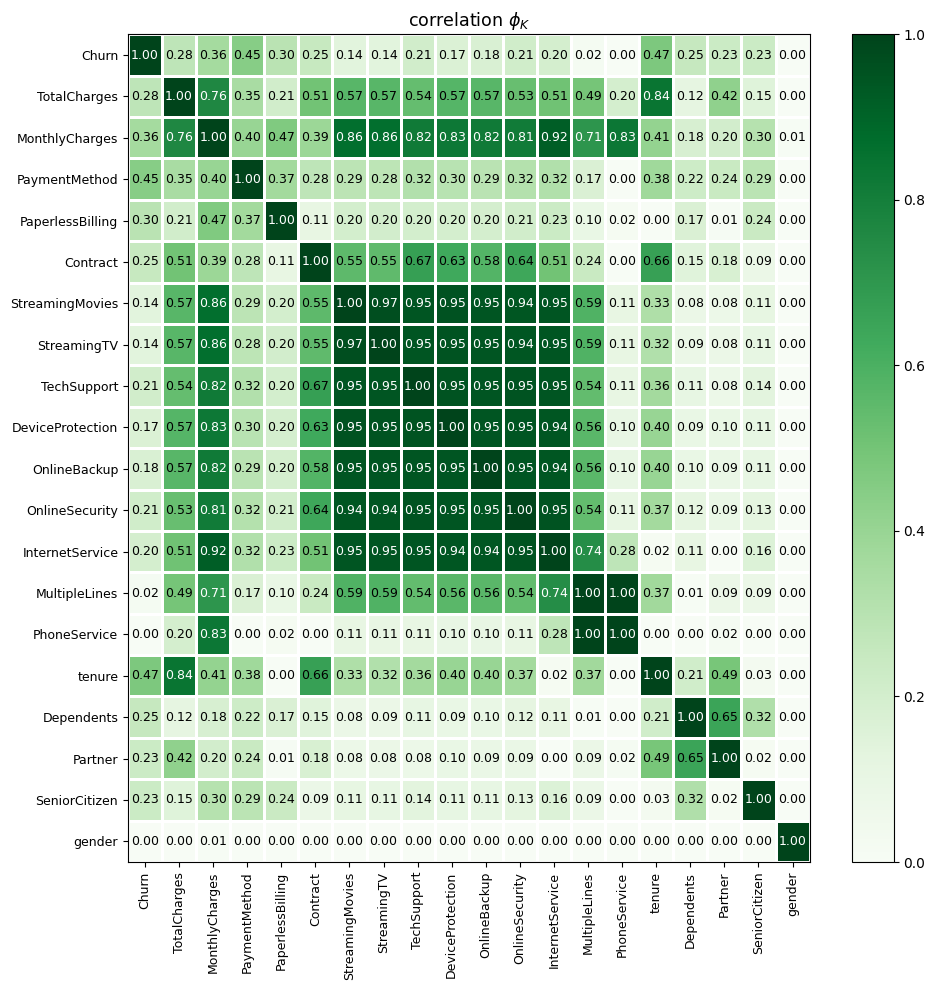

In [356]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(10, 10))
plt.tight_layout()

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

Можно сделать вывод, что клиент уходит из-за взаимосвязи в первую очередь со следующими покзателями:
- количество месяцев, в течение которых клиент оставался в компании (0,47)
- способ оплаты клиента (0,45)
- ежемесячный платеж (0,36)